# 합성곱
## : 입력 데이터에 도장을 찍어 유용한 특성만 드러내게 하는 것으로 비유
### 커널 = 필터 = 가중치

#### Dense를 기준으로 하면(밀집층) -> 완전연결 신경망
#### 뉴런마다 입력 개수의 가중치가 있음
#### w1 ~ w10 와 절편 b를 랜덤하게 초기화 한 후 에포크를 반복하면서 경사하강법 알고리즘을 사용하여
#### 손실이 낮아지도록 최적의 가중치와 절편을 찾는 것이 모델 훈련

#### 밀집층에 뉴런이 3개 있으면 출력은 3개가 됨
#### 784 픽셀 --> 100 뉴런 --> 출력 100

## 합성곱의 계산방식은 밀집층과 다름
#### - 입력데이터의 전체에 가중치가 적용되는 것이 아니라,
#### - 일부에 가중치를 곱해 줌

#### - w1 ~ w3 입력이 처음 3개의 특징(커널=필터=가중치)과 곱해져서 1개의 출력
#### - 한 칸씩 이동하면서 두 반쩨, 세 번째 입력과 곱해져서 출력을 생성
#### - 첫 번째 사용된 가중치 w1 ~ w3와 절편 b가 두 번째 세 번째 합성곱에도 동일하게 적용
#### - 10개의 데이터에 가중치(3개짜리를 한 칸씩 이동) --> 8개 출력
#### - (이전의 밀집층은 입력 개수만큼 곱하여 출력하므로 계산방식이 다름)
#### - 이전의 밀집층은 10개의 가중치를 가지고 한개의 출력이라면
#### - 합성곱은 3개의 가중치를 가지고 8개의 출력
#### - 입력이 2차원이면 필터도 2차원인 형태

## 합성곱을 통해서 얻은 출력 : 특성 맵

In [2]:
from tensorflow import keras

In [3]:
# keras 층은 layes 하위 클래스에서 모두 제공하나,
# 2차원의 합성곱은 Conv2D 클래스에서 제공
# Conv2D(필터의 개수, kernel_size=(필터에 사용할 커널의 크기), activation='활성화 할 함수')

keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu')
# 필터의 개수와 커널 크기는 필수 매개변수

**API를 이용하면 합성곱 층을 쓸 때에도 Conv2D 사용**


**합성곱 -> 기존 Dense 층에 Conv2D 층을 넣으면 됨 (단, kernel_size만 고려하면 됨)**

### - 패딩 : 출력의 크기를 동일하게 맞춰준다

기존의 입력이 (4,4)가 있다고 가정했을 때, 여기에 (3,3)을 입력했을 때 총 4개의 출력이 나옴.

그러나 패딩을 이용하면 출력의 크기를 동일하게 맞춰주어 커널을 16번 똑같이 찍어줄 수 있음

ex. (4,4) -> 커널, 즉 도장(3,3) --> 출력의 크기도 (4,4)로 맞춰 줌

**동일한 출력의 크기로 맞춰주려면 더 큰 크기에 가상의 입력 공간을 만들어 주어 주변에 가상의 값을 채움**

**즉 (3,3)이면 총 4번밖에 못 찍는데, 각 옆으로 한칸씩 더 있다고 가정하고 (4,4)로 찍어준다고 가정하는 것임**

1. 값은 0 (실제 입력값이 아님, 단지 커널이 도장을 찍을 횟수를 늘려주는 역할을 할 뿐이므로 계산에 영향을 미치지 않음),
2. 입력특성과 출력특성의 크기를 동일하게(주위에 0) 
3. padding=same (가장 많이사용)


**패딩 없이 사용-> 밸리드 패딩 (특성맵의 크기가 줄어들 수밖에 없음)**



(단, 패딩을 사용할 때 정보를 잃지 않도록 해야 하기 때문에 **same padding**을 주로 사용)

In [4]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')

두 칸씩 건너 뛸 수도 있음

즉 이동크기 지정 (Default : 1)

그러나 특성맵이 더 작아질 수 있음

--> strides 매개변수

## 폴링
- 합성곱을 통해 나온 특성맵의 가로 세로 길이, 즉 차수를 줄이는 역할 (단, 개수를 줄이지는 않음)


- convolution과 pooling 연산은 파라미터의 수를 줄여나가는 과정이다. 하지만 이러한 과정에서 지나치게 데이터가 축소되어 정보가 소실되는 것을 방지하기 위해 데이터에 0으로 이루어진 패딩을 주는 경우가 있다.

**케라스에서 padding을 설정하는 방법은 아래와 같이 두 가지가 있다.**

**합성곱 혹은 풀링 연산을 수행하는 레이어에 파라미터로 설정. 이 경우 아래와 같은 두 가지 옵션 중 하나를 선택할 수 있다.**

1. valid: 패딩을 하지 않음(사이즈가 맞지 않을 경우 가장 우측의 열 혹은 가장 아래의 행을 드랍한다).
2. same: 필터의 사이즈가 k이면 사방으로 k/2 만큼의 패딩을 준다.

- 4x4 입력 -> (3 x 3) 3번  커널을 적용  -> (2,2,3) (특성맵)  ->폴링(2,2) ->(1,1,3)특성맵


- 폴링: 가중치가 없고   최댓값을 선택하는 것이 최대폴링, 평균값을 선택하는 것을 평균폴링




**매개변수 strides**

- 연산을 수행할 때 윈도우가 가로 그리고 세로로 움직이면서 내적 연산을 수행하는데, 한 번에 얼마나 움직일지를 의미
- 정수 혹은 두 정수로 이루어져 있으며, 풀링(pooling)창의 이동거리를 지정
- strides 가 None 이면 pool_size 와 동일하게 설정됨


In [5]:
keras.layers.MaxPool2D(2, padding='valid', strides=2) # padding='valid' : 디폴트값

In [6]:
# 평균폴링
# keras.layers.AveragePooling2D(2, padding='valid', strides=2)

In [7]:
(x_train,y_train),(x_target,y_target) = keras.datasets.fashion_mnist.load_data()

## 표준화
**흑백 이미지 같은 경우는 컬러와 관련된 채널 차원이 없기 때문에 2차원 배열임**


**그러므로 3차원 배열을 사용해야 하는 Conv2D 에서 흑백 이미지를 사용하기 위해서는 차원을 추가해 주어야 함**

### - Conver2D  흑백채널에 채널차원을 추가

In [8]:
x_train.shape # 이 데이터 reshape 하여 차수 변경하기

(60000, 28, 28)

In [9]:
x_reshape_scaled =  x_train.reshape(-1,28,28,1) / 255.0 # 차원을 늘려주면서 데이터 전처리까지 완료
x_reshape_scaled.shape

(60000, 28, 28, 1)

In [10]:
from sklearn.model_selection import train_test_split
x_train_scaled, x_target_scaled, y_train_scaled, y_target_scaled  = train_test_split(x_reshape_scaled,y_train,
                                                                                  test_size=0.2, random_state=42)

In [11]:
model = keras.Sequential()

**첫번째 layer 가 Conv2D 인 경우는 "input_shape"를 입력해 주어야 함**


- (이미지의 높이, 이미지의 너비, 컬러채널) 형태의 tensor로 입력을 받음

- 컬러채널


    - color 인 경우 (R, G, B) 세 개의 채널을 가지기에 3
    - greyscale (흑백)인 경우 한 개의 채널을 가지기에 1
    
**출력 결과 형태 : output = (input_shape - pool_size + 1) / strides)**

In [12]:
# Conv2D(필터의 개수, 커널의 개수, 활성화 함수, 패딩, ....)

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1) ) ) # 커널층 생성

In [13]:
model.add(keras.layers.MaxPool2D(2)) # 절반 (풀링층 추가 : 차수 줄이기)

In [14]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same') ) # 더 많은 특성(커널)을 참조하기 위해 늘려줌
# 결과를 받아오는 것이므로 input_shape 매개면수 X

model.add(keras.layers.MaxPool2D(2)) # 절반 (풀링층 추가 : 차수 줄이기) --> (2,2)인 셈

In [15]:
# 최종 특성맵의 크기는 ?  (7, 7, 64) --> 입력데이터로 사용하기
# 합성곱으로 차원을 축소한 데이터를 입력데이터로 사용하기

model.add(keras.layers.Flatten()) # 층을 쭈욱 일자로 펴주기

# 밀집층 생성
# 처음 밀집층 만들 때 최초로 데이터를 받아들이기 위해 input_shape를 사용해 주었기 때문에 여기에서는 필요 없음

model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax')) # 다중분류 시 사용함수 : softmax

In [16]:
model.summary()

# (3 X 3 X 1) X 32 + 32 (필터만 적용했기 때문에 차수는 그대로 28*28) - 최초의 필터 적용
# (3 X 3 X 32) X 64 + 64 (차수가 반으로 줄어듦) --> (3 X 3 X 32)를 하나의 커널로 64번을 찍어주기 때문
# 채널 하나짜리가 7*7의 이미지의 특성은 64개
# 이것을 flatten에 적용하여 데이터를 쭉 펼치면 (7 X 7 X 64)가 됨
# Flatten --> 고차원의 데이터의 자수를 줄이는 데 유용

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

**출력 결과 형태 : output = (input_shape - pool_size + '필터의 개수') / strides)**

but, 여기에서는 필터값만 줬기 때문에 pool_size를 제외하고 연산됨



### 신경망 모델의 구조를 시각적으로 간단히 확인할 때 라이브러리
## : pydot, graphviz

In [17]:
# !pip install pydot  # 별도로 설치해 주어야 실행됨

In [18]:
# !pip install graphviz  # 별도로 설치해 주어야 실행됨

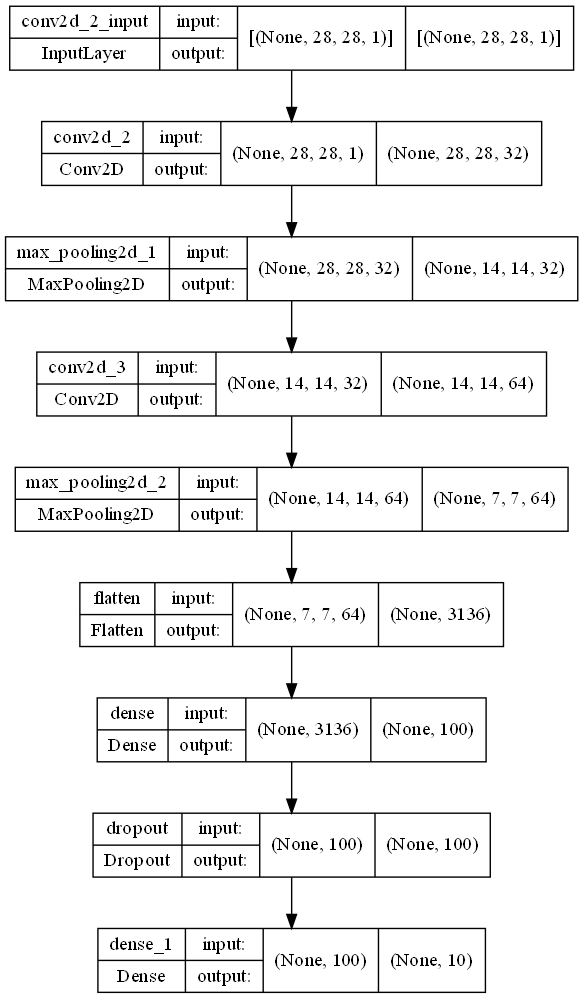

In [40]:
# 시각화 도구
keras.utils.plot_model(model, show_shapes=True, to_file='result.png', dpi=100)

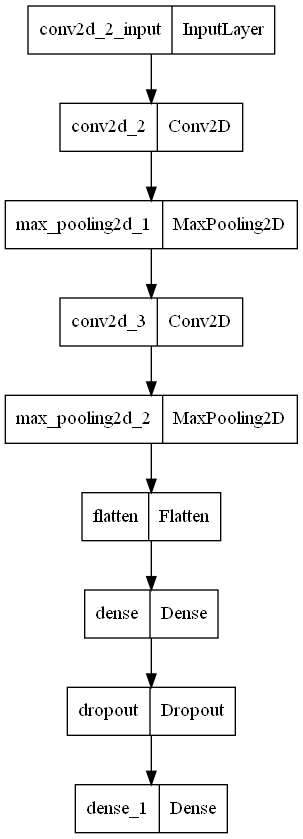

In [19]:
keras.utils.plot_model(model) # 모델 속성으로만 구성된 이미지 출력

# compile & fit & evaluate

In [20]:
# optimizer : adam
# modelCheckPoint
# earlyStopping

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpointCB = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
earlyStoppingCB = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [21]:
history = model.fit(x_train_scaled, y_train_scaled, epochs=25,
                   validation_data=(x_target_scaled, y_target_scaled),
                    callbacks=[checkpointCB, earlyStoppingCB])

Epoch 1/25
1500/1500 [==============================] - 99s 65ms/step - loss: 0.4868 - accuracy: 0.8237 - val_loss: 0.3103 - val_accuracy: 0.8868
Epoch 2/25
1500/1500 [==============================] - 99s 66ms/step - loss: 0.3220 - accuracy: 0.8830 - val_loss: 0.2704 - val_accuracy: 0.8992
Epoch 3/25
1500/1500 [==============================] - 94s 63ms/step - loss: 0.2783 - accuracy: 0.8983 - val_loss: 0.2664 - val_accuracy: 0.8992
Epoch 4/25
1500/1500 [==============================] - 91s 61ms/step - loss: 0.2494 - accuracy: 0.9078 - val_loss: 0.2348 - val_accuracy: 0.9119
Epoch 5/25
1500/1500 [==============================] - 93s 62ms/step - loss: 0.2215 - accuracy: 0.9178 - val_loss: 0.2292 - val_accuracy: 0.9171
Epoch 6/25
1500/1500 [==============================] - 92s 61ms/step - loss: 0.2033 - accuracy: 0.9249 - val_loss: 0.2282 - val_accuracy: 0.9142
Epoch 7/25
1500/1500 [==============================] - 91s 61ms/step - loss: 0.1841 - accuracy: 0.9302 - val_loss: 0.2387 -

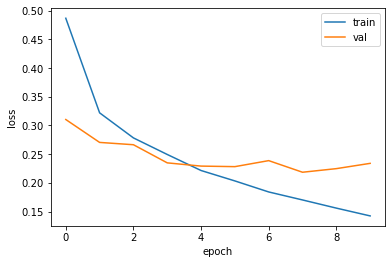

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### epochs = 6 or 7 최적점

In [23]:
# 성능 평가
model.evaluate(x_target_scaled, y_target_scaled)

375/375 [==============================] - 7s 19ms/step - loss: 0.2185 - accuracy: 0.9226


[0.21846447885036469, 0.9225833415985107]

### epochs = 7 최적점
### 평가한 값과 에포크를 늘려가며 학습한 값이 일치하는 epoch = 5
### 즉 epoch값이 6이라면 시각화에서는 손실값 상승 직전인 5에 대한 epoch인 것
### (시각화에서는 0부터 시작하기 때문)

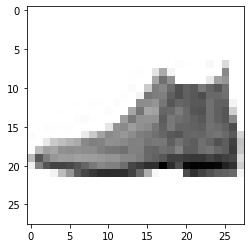

In [24]:
plt.imshow(x_target[0], cmap='gray_r')
plt.show()

In [25]:
x_target_scaled.reshape(-1,28,28).shape

(12000, 28, 28)

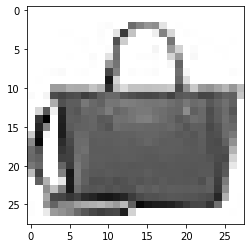

In [26]:
plt.imshow(x_target_scaled.reshape(-1,28,28)[0], cmap='gray_r')
plt.show()
# 학습용과 검증용 데이터가 섞인 상황이기 때문에

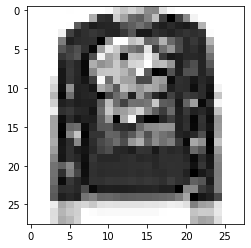

In [27]:
plt.imshow(x_target_scaled.reshape(-1,28,28)[100], cmap='gray_r')
plt.show()

In [28]:
# 학습 시 4차원으로 했기 때문에 4차원 형태로 불러와야 함
x_target_scaled[:1].shape

(1, 28, 28, 1)

In [29]:
model.predict(x_target_scaled[:1])
# 클래스 10개 출력 (그 중 1에 가까운 데이터가 정답임)
# --> 9번째에 해당하는 클래스

array([[1.34431816e-15, 2.07550390e-18, 4.33881047e-18, 2.71031930e-15,
        2.69617883e-17, 1.92320141e-16, 1.11220305e-14, 9.57772248e-18,
        1.00000000e+00, 8.94895255e-14]], dtype=float32)

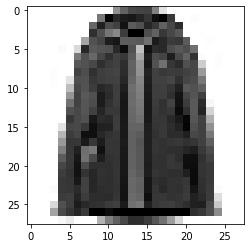

In [30]:
plt.imshow(x_target_scaled.reshape(-1,28,28)[8], cmap='gray_r')
plt.show()

In [31]:
x_target_scaled[2:3].shape

(1, 28, 28, 1)

In [32]:
import numpy as np
predict_index = np.argmax(model.predict(x_target_scaled[2:3]))
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
classes[predict_index]

'스니커즈'

In [33]:
# cnn : 합성 신경곱 + 완전연결 신경망에서는 4차원 배열 + 데이터 전처리(표준화)를 했기 때문에
#       검증 데이터도 동일한 형태로 바꾸어 주어야 하는 것
#       따라서 아래는 잘못된 테스트 결과임

model.evaluate(x_target, y_target)
# 동작은 하지만 올바른 테스트 방법이 아님

313/313 [==============================] - 6s 19ms/step - loss: 37.9147 - accuracy: 0.8865


[37.91474151611328, 0.8865000009536743]

In [34]:
x_target.shape
# 훈련을 4차원으로 했는데 현재 데이터는 3차원 배열임
# 합성신경망을 이용한 차수를 넣어 평가해 주어야 하기 때문에 실제 정확도 보다 떨어질 수 있음

(10000, 28, 28)

In [35]:
# 차수 변경
model.evaluate(x_target.reshape(-1,28,28,1) / 255.0 , y_target)

# x_target 데이터 표준화
# y_target은 1차원(정답데이터)이므로 바꿔줄 필요 X

313/313 [==============================] - 6s 19ms/step - loss: 0.2467 - accuracy: 0.9156


[0.2467048317193985, 0.9156000018119812]